# <center>PROBLEM SORTOWAŃ - CZĘŚĆ II</center>

1. Sortowanie szybkie (quicksort)

Idea:
 - dla danej tablicy danych chcemy wybrać element $x$ określany jako pivot
 - dla pivotu szukamy jego miejsce w tablicy, czyli tak przestawiamy elementy, aby mniejsze i większe wartości były odpowiednio po lewej i prawej stronie
 - można do tego podejść w taki sposób, że jest to po części sytuacja odwrotna do mergesorta. Na początku, w czasie liniowym, szukamy miejsca dla elementu (sortujemy go), a następnie rekurencyjnie wywołujemy tę samą procedurę na mniejszych fragmentach tablicy (bez posortowanego elementu)


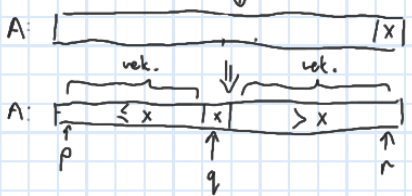


2. Funkcja partition (wersja Lomuto)

Funkcja, o której mowa, będzie przestawiała elementy, innymi słowy znajdywała miejsce dla posortowanego elementu

Idea:
 - rozważamy fragment $[p,r]$
 - bierzemy pivot z końca tablicy (oznaczymy jako $x$)
 - chcemy utrzymywać lewy fragment danych w takim stanie, aby każda wartość z tego obszaru była mniejsza od wartości pivotu
 - indeks $i$ będzie oznaczał ostatnią wartość mniejszą od $x$
 - indeks $j$ będzie szukał wartości mniejszych od $x$
 - czyli indeks $i$ będzie poruszał się tylko w momencie znalezienia przez indeks $j$ wartości mniejszej od $x$, aby nastąpiła zamiana elementów

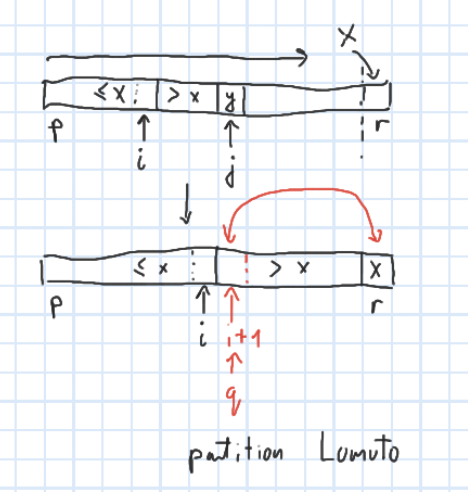

Przy wyborze pivota na ostatni element istnieje ryzyko, że w przypadku, gdy tablica jest posortowana, to złożoność wyniesie $n^2$ 

In [ ]:
def partition(A, p, r):

    x = A[r]

    i = p-1  # wybór na ostatni indeks przed większymi od pivotu

    for j in range(p, r):  # bo na koncu jest pivot
        if A[j] <= x:
            i += 1  # przechodzimy na kolejne miejsce, ktore nalezy zamienic
            A[j], A[i] = A[i], A[j]  # swap
    A[r], A[i+1] = A[i+1], A[r]  # zamiana pivotu z elementem większym od niego

    return i+1

3. Analiza złożoności sortowania szybkiego

Idealne podziały (partition zawsze dzieli fragment na pół)
 - $T(n)=\begin{cases} c, & n<=1 \\ T(\lfloor \frac{n}{2} \rfloor) + T(\lfloor \frac{n}{2} \rfloor) + cn, & n>1 \end{cases}$
 - Czyli stały czas $c$ dla jednostkowych danych, a w innym przypadku suma czasu posortowania fragmentów i czasu $cn$ na znalezienie miejsca dla pivotu

Drzewo wywołań rekurencyjnych:

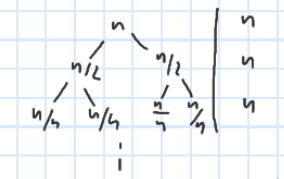

Dla idealnych podziałów mamy złożonosć $\Theta(nlogn)$
 - podziały, w których części są w proporcjach np. $3:4$, $1:100$, też dadzą złożoność $nlogn$, ale z gorszą stałą $c$


Podziały pechowe
 - $T(n)=\begin{cases} c, & n<=1 \\ T(n-1)+ cn, & n>1 \end{cases}$
 - podobnie czas stały dla jednostkowych danych, ale w innym przypadku mamy sumę posortowania $n-1$ elementów oraz znalezienia miejsca dla pivotu
 - rozpisując rekurencje otrzymamy: </br>
   $T(n)=cn+T(n-1)$ </br>
   $= cn + c(n-1) + T(n-2)$ </br>
   $= ... = cn + c(n-1) + c(n-2) + ... + c = \Theta(n^2)$ (jako suma szeregu arytmetycznego) 

Jest to zatem mieszanka szczęścia i pecha:
 - wyobraźmy sobie sytuację gdzie naprzemian natrafiamy na podziały idealne oraz pechowe
 - taką serię podziałów możemy przybliżyć z pomocą stałej do pewnego podziału idealnego

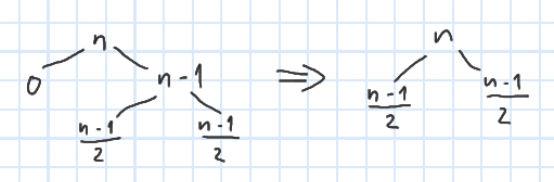

Często w miejsce indeksu pivota (zamiast ostatniego indeksu) umieszczamy "lepszy pivot":
 - losowy element tablicy
 - mediana z pierwszego, ostatniego i środkowego elementu tablicy
 - ...

W Cormenie rozpisana jest analiza dla pivotu losowego, gdzie udowodniona jest finalna złożoność $O(nlog)$

In [4]:
def partition(A, p, r):

    x = A[r]

    i = p-1

    for j in range(p, r):
        if A[j] <= x:
            i += 1
            A[j], A[i] = A[i], A[j]
    A[r], A[i+1] = A[i+1], A[r]

    return i+1

def quick_sort(A, p, r):  # p - poczatek, r - koniec przedzialu
    if p < r:
        q = partition(A, p, r)
        quick_sort(A, p, q-1)
        quick_sort(A, q+1, r)


A1=[1,2,5,6,4,3,2,1,24,2,6,7,4,3,221,7]

A2=[2,1,3,7]

def check(A):
    print("input array: ",end='')
    print(*A)
    quick_sort(A,0,len(A)-1)
    print("output array: ",end='')
    print(*A)
    print()
    
check(A1)    
check(A2)    

input array: 1 2 5 6 4 3 2 1 24 2 6 7 4 3 221 7
output array: 1 1 2 2 2 3 3 4 4 5 6 6 7 7 24 221

input array: 2 1 3 7
output array: 1 2 3 7



4. Usunięcie rekurencji ogonowej sortowania szybkiego

W podstawowej implemetacji sortowania szybkiego
 - w ostatniej linijce funkcji mamy wywołanie jej samej (rekurencja ogonowa)
 - możemy to zamienić na pętlę while, w której na początku wykonujemy algorytm dla lewego drzewa rekurencji, a następnie dla prawego
 - ograniczamy w ten sposób zużycie pamięci

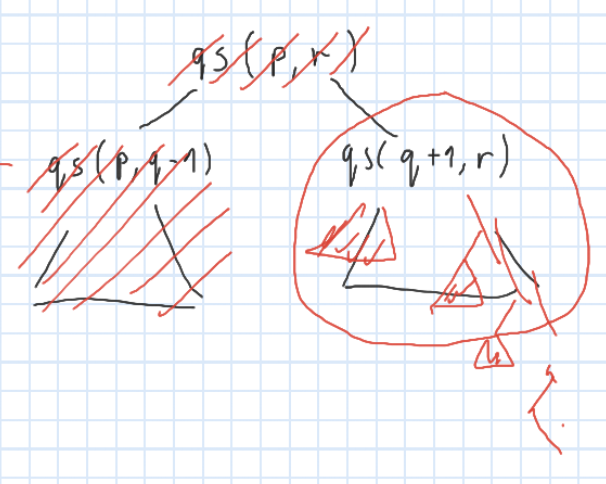

In [ ]:
def quickSort(A, p, r):
    while p < r:
        q = partition(A, p, r)
        quickSort(A, p, q-1)
        p = q+1 

5. Statystyki pozycyjne  (quick select)

Zastosowanie funkcji partition do obliczania statystyk pozycyjnych

$def.$ $k$-tą statystyką pozycyjną nazywamy element $x$, który po posortowaniu tablicy $A$ byłby na $k$-tej pozycji.

W szczególności:
 - $\text{select}(A,0) = \text{min}(A)$
 - $\text{select}(A,n-1) = \text{max}(A)$
 - $\text{select}(A,\frac{n-1}{2}) \approx \text{mediana z }A$

Idea:
 - załóżmy, że chcemy policzyć $\text{select}(A,k)$
 - dla tablicy $A$ możemy wykonać funkcje partition i otrzymamy pivot $x$ (indeks to $q$)
 - jeśli $q=k$, to jest to interesujący nas indeks i zwracamy $x$
 - jeśli $q>k$ lub $q<k$ to wywołujemy rekurencję na odpowiednim fragmencie tablicy

6. Analiza złożoności statystyk pozycyjnych

Dla idealnych podziałów funkcji partition:
 - $T(n)=\begin{cases} c, & n<=1 \\ T(\lfloor \frac{n}{2} \rfloor)+ cn, & n>1 \end{cases}$
 - czyli analogicznie jak w sortowaniu szybkim mamy czas stały dla jednostkowych danych, a w innym przypadku, będzie to czas znalezienia statystyki na fragmencie tablicy

Dla pechowych podziałów:
 - $T(n) = cn + \frac{n}{2} + \frac{n}{4} + \frac{n}{8} + \frac{n}{16} + ... = O(n)$ (ciąg geometryczny)


In [14]:
def select(A, k, p, r):

    q = partition(A, p, r)

    if q == k:
        return A[q]

    elif q > k:
        return select(A, k, p, q-1)

    elif q < k:
        return select(A, k, q+1, r)
    
A1=[1,2,5,6,4,3,2,1,24,2,6,7,4,3,221,7]

A2=[2,1,3,7]

def check(A,k):
    x=select(A,k,0,len(A)-1)
    print("input array: ",end='')
    print(*A)
    quick_sort(A,0,len(A)-1)
    print("sorted array: ",end='')
    print(*A)
    print("k =",k)
    print("k-th element = ",x)
    print()

check(A1,len(A1)-1) # max(A)
check(A2,2)

input array: 1 2 5 6 4 3 2 1 2 6 7 4 3 7 24 221
sorted array: 1 1 2 2 2 3 3 4 4 5 6 6 7 7 24 221
k = 15
k-th element =  221

input array: 2 1 3 7
sorted array: 1 2 3 7
k = 2
k-th element =  3

